In [7]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm
import numpy as np
import csv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, poisson
import pandas as pd 
from pandas import Series, DataFrame 
import xgboost as xgb
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

In [8]:
data = pd.DataFrame(np.genfromtxt('AppML_InitialProject_train.csv', names=True, delimiter=','))
variables = data.columns
input_variables = variables[(variables != "p_Truth_isElectron") & (variables != "p_Truth_Energy")]
electron_classification = data["p_Truth_isElectron"]
regression_target = data["p_Truth_Energy"]
input_data = data[input_variables]

In [ ]:
input_train, input_test, truth_train, truth_test = train_test_split(input_data, electron_classification, test_size=0.15, random_state=2)

In [12]:
dtrain = xgb.DMatrix(input_train, label=truth_train)

params = {
    'max_depth': 10,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'booster': 'gbtree'
}
num_rounds = 100
bst = xgb.train(params, dtrain)
dpredict = xgb.DMatrix(input_test, label=truth_test)
y_pred = bst.predict(dpredict)
print(y_pred)

# Convert probabilities to binary labels
y_pred_labels = (y_pred > 0.5).astype(int)
# Assume 'y' contains the true labels
accuracy = accuracy_score(truth_test, y_pred_labels)
print(f"Accuracy: {accuracy}")


/opt/anaconda3/envs/appliedmachinelearning/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:25:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.18094674 0.18094674 0.18094674 ... 0.18094674 0.18094674 0.8183126 ]


[('pX_MultiLepton', 29857.474609375), ('p_numberOfInnermostPixelHits', 5463.05029296875), ('p_ptPU30', 157.83016967773438), ('p_etcone20', 130.55960083007812), ('p_TRTPID', 87.83683776855469), ('pX_neflowisolcoreConeEnergyCorrection', 56.98879623413086), ('pX_ptconecoreTrackPtrCorrection', 56.234375), ('pX_ambiguityType', 47.46360397338867), ('pX_ptcone40', 38.26498794555664), ('p_sigmad0', 34.28779220581055), ('p_dPOverP', 33.181434631347656), ('p_vertex', 31.970775604248047), ('p_ptcone30', 31.230703353881836), ('p_ptcone40', 30.89272117614746), ('p_etcone30', 29.08524513244629), ('pX_topoetconecoreConeEnergyCorrection', 26.17755889892578), ('p_Rhad', 24.849674224853516), ('p_charge', 23.61564064025879), ('pX_topoetcone30ptCorrection', 23.488636016845703), ('p_d0', 23.376741409301758), ('pX_E3x5_Lr1', 22.987560272216797), ('pX_E7x7_Lr0', 18.918161392211914), ('p_numberOfSCTHits', 18.594532012939453), ('pX_E5x7_Lr1', 18.142433166503906), ('p_deltaEta1', 17.600879669189453), ('p_deltaP

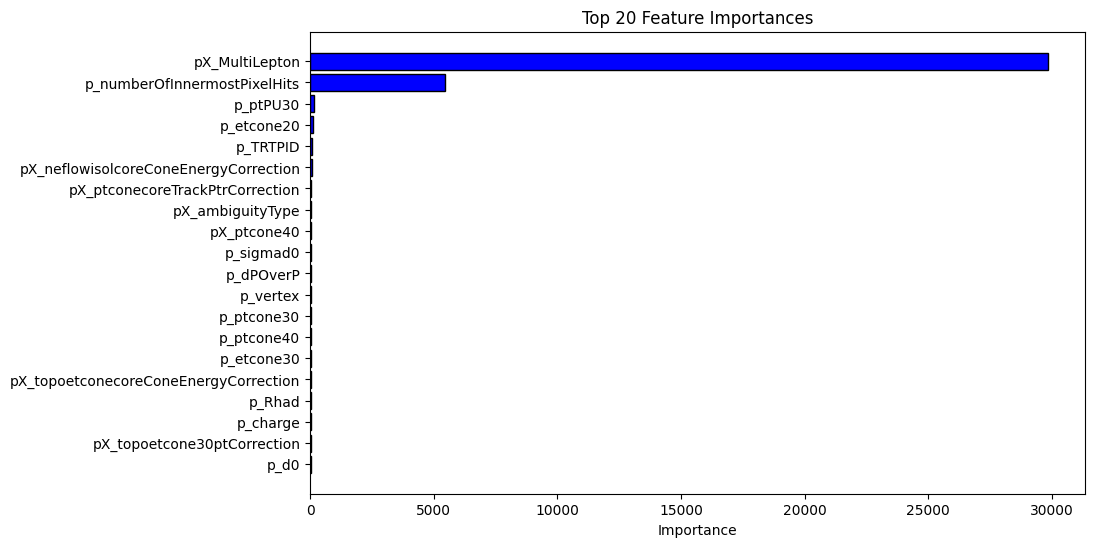

In [14]:
# Get feature importance and sort them
importance = bst.get_score(importance_type='gain')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
print(sorted_importance)
# Extract top 20 features
top_20_features = sorted_importance[:20]
feature_names, importances = zip(*top_20_features)

# Adjust the plotting code to dynamically handle the number of features
num_features = len(importances)  # This ensures we do not exceed the actual number of features available
print(num_features)
plt.figure(figsize=(10, max(6, 0.3 * num_features)))  # Dynamically size the plot based on the number of features
plt.barh(range(num_features), importances[::-1], color='blue', edgecolor='black')
plt.yticks(range(num_features), feature_names[::-1])
plt.gca()  # Invert the y-axis to have the highest value on top
plt.xlabel('Importance')
plt.title(f'Top {num_features} Feature Importances')
plt.show()

/opt/anaconda3/envs/appliedmachinelearning/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	train-logloss:0.60784	train-error:0.03185	validation-logloss:0.60853	validation-error:0.03722
[1]	train-logloss:0.53781	train-error:0.03066	validation-logloss:0.53930	validation-error:0.03678
[2]	train-logloss:0.47941	train-error:0.03007	validation-logloss:0.48160	validation-error:0.03578
[3]	train-logloss:0.43008	train-error:0.02962	validation-logloss:0.43299	validation-error:0.03539
[4]	train-logloss:0.38776	train-error:0.02901	validation-logloss:0.39136	validation-error:0.03506
[5]	train-logloss:0.35131	train-error:0.02865	validation-logloss:0.35569	validation-error:0.03539
[6]	train-logloss:0.31965	train-error:0.02817	validation-logloss:0.32467	validation-error:0.03456
[7]	train-logloss:0.29191	train-error:0.02789	validation-logloss:0.29763	validation-error:0.03472
[8]	train-logloss:0.26754	train-error:0.02731	validation-logloss:0.27396	validation-error:0.03406
[9]	train-logloss:0.24605	train-error:0.02681	validation-logloss:0.25338	validation-error:0.03428
[10]	train-logloss:0

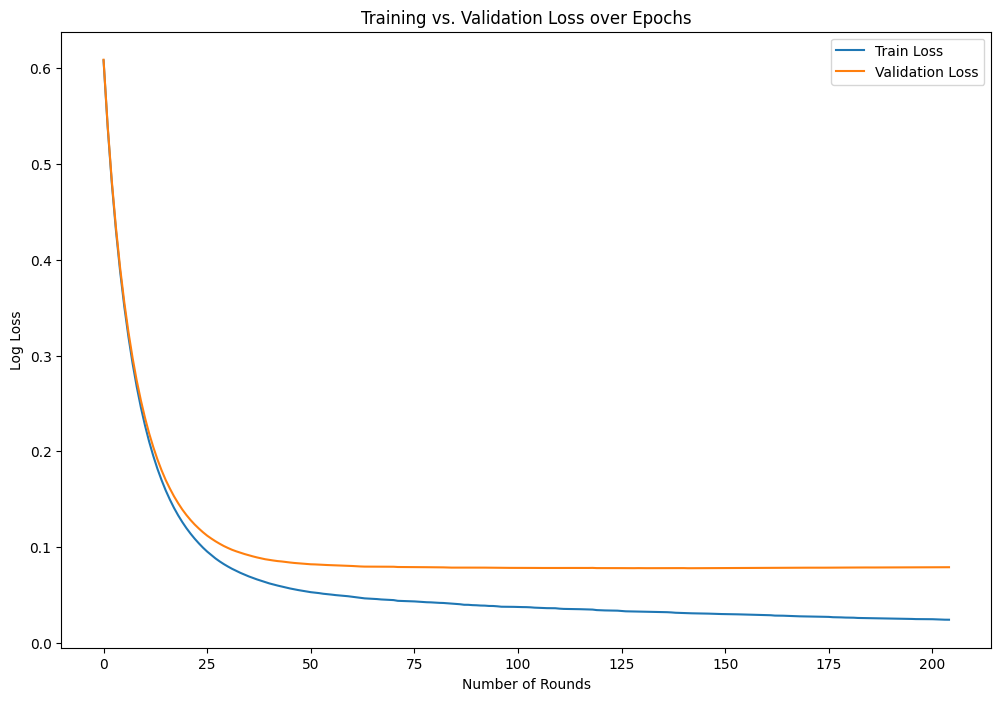

In [29]:
input_data_20 = input_data[list(feature_names)]

input_train_20, input_test_20, truth_train, truth_test = train_test_split(input_data_20, electron_classification, test_size=0.20, random_state=2)
# Create new DMatrix with top features for training
dtrain_20 = xgb.DMatrix(input_train_20, label=truth_train)

params = {
    'max_depth': 10,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'booster': 'gbtree',
    'eval_metric': ['logloss', 'error'],
}
num_rounds = 500

dpredict_20 = xgb.DMatrix(input_test_20, label=truth_test)
# Watchlist to keep track of train and validation logloss for each epoch
evals = [(dtrain_20, 'train'), (dpredict_20, 'validation')]

evals_result = {}  # Dictionary to store evaluation results

# Training the model with the recorded evaluation metrics
bst_20 = xgb.train(params, dtrain_20, num_boost_round=num_rounds, evals=evals,
                 evals_result=evals_result,early_stopping_rounds=50)

# Prepare test set DMatrix using top 20 features
y_pred_20 = bst_20.predict(dpredict_20)

# Convert probabilities to binary labels
y_pred_labels_20 = (y_pred_20 > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(truth_test, y_pred_labels_20)
print(f"Accuracy: {accuracy}")

# Extract the evaluation metrics
train_logloss = evals_result['train']['logloss']
val_logloss = evals_result['validation']['logloss']

# Plotting the training and validation logloss
plt.figure(figsize=(12, 8))
train_rounds = range(len(train_logloss))
val_rounds = range(len(val_logloss))
plt.plot(train_rounds, train_logloss, label='Train Loss')
plt.plot(val_rounds, val_logloss, label='Validation Loss')
plt.xlabel('Number of Rounds')
plt.ylabel('Log Loss')
plt.title('Training vs. Validation Loss over Epochs')
plt.legend()
plt.show()

random seed = 42
max depth = 10, eta = 0.1, validation loss stops at 50, accuracy = 0.97294444
depth = 9, eta = 0.1, accuracy = 0.97294444

random seed = 2
depth = 10, eta = 0.1, Accuracy: 0.9752777777777778

In [23]:
d_train_final = xgb.DMatrix(input_data_20, label=electron_classification)

params = {
    'max_depth': 10,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'booster': 'gbtree'
}
num_rounds = 125
bst_final = xgb.train(params, d_train_final, num_boost_round=num_rounds)

/opt/anaconda3/envs/appliedmachinelearning/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:29:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [34]:
model_dump = bst_final.get_dump()
print(f'Number of trees: {len(model_dump)}')

Number of trees: 125


In [24]:
test_data = pd.DataFrame(np.genfromtxt('AppML_InitialProject_test_classification.csv', names=True, delimiter=','))

test_input_data = test_data[input_variables]
test_input_20 = test_input_data[list(feature_names)]



In [33]:
dpredict_test = xgb.DMatrix(test_input_20)
y_pred_test = bst_final.predict(dpredict_test)
df = pd.DataFrame(y_pred_test, columns=['Probability'])
df.to_csv('Classification_TheodoreBeevers_XGBoost1.csv', index=True, header=False)

variables = pd.DataFrame(feature_names, columns=['Variable'])
variables.to_csv('Classification_TheodoreBeevers_XGBoost1_VariableList.csv',index=False, header=False)

/opt/anaconda3/envs/appliedmachinelearning/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
